## Hypothesis
DV1=HabitG=mean(HabitC1,HabitC2,HabitC3,HabitC4)

In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[131] "Utility"     "Winter_avg"  "X"           "X.9to5"      "cold"       
[136] "hot"         "valid"       "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3 
232 261 331 

In [2]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncHomeS" "63"      
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      


In [3]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 826  98
[1] 627  98


In [4]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
#"Frugal",
"MC",
"EnergyC",
#"Trust",
"ComfNS",
"ComfNW",
"Atti",
#"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude")

In [5]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
 [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
[11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
[16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
[21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
[26] "EmerRForm"  "EnergyC1"   "EnergyC2"   "EnergyC3"   "EnergyC4"  
[31] "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"    "Gender"    
[36] "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"    "HabitC4"   
[41] "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"    "HabitE2"   
[46] "HabitE3"    "HabitG"     "HomeS"      "HouseholdS" "INT1"      
[51] "INT2"       "INT3"       "INT4"       "IncAutoS"   "IncAutoW"  
[56] "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W" "IncEmer30S"
[61] "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"     "Latitude"  
[66] "MC"         "MC1"        "MC2"        "MC3"        "MC4"       
[71] "MC5"        "OwnRent"    "PBC1"       "PBC2"       "PBC3R"     
[76] "PBC4"       "PBC5"       "Political"  "RewardForm" "SN"        
[81] "SN1"        "SN2"        "SN3"        "SN4"        "Sqft"      
[86] "SqftCate"   "State"      "SubNorm"    "SubNorm1"   "SubNorm2"  
[91] "SubNorm3"   "Summer_avg" "Trust1"     "Trust2"     "Trust3"    
[96] "Trust4"     "Winter_avg" "X.9to5"

[1] "Age"        "Atti"       "ComfNS"     "ComfNW"     "Educ"      
 [6] "EnergyC"    "Ethnic"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "PBC"        "Political"  "SN"         "SqftCate"

In [6]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [7]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [8]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "MC"         "ComfNS"     "ComfNW"     "Atti"      
[16] "SN"         "HabitG"     "HabitC"

In [9]:
data1 [is.na(data1$IncHomeS), ]

IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,Latitude,MC,ComfNS,ComfNW,Atti,SN,HabitG,HabitC


In [10]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.1     5.0     8.0 


  1   2   3   4   5   6   7   8 
 54  42 120 214  56  59  48  34 


  1   2   3   4   5 
 66 221 144 115  81 

In [11]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "MC"         "ComfNS"     "ComfNW"     "Atti"      
[16] "SN"         "HabitG"     "HabitC"

In [12]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [13]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      1.80      11.15       0.50       0.52       1.12       1.21       0.82 
    Ethnic     Income       Educ   Latitude         MC     ComfNS     ComfNW 
      0.38       1.97       1.11       5.06       1.07       1.45       1.74 
      Atti         SN     HabitG     HabitC 
      1.10       1.41       1.17       1.41

In [14]:
hiCor(data2,.4)

,OwnRent,SqftCate,MC,Atti
OwnRent,1.000,0.4810,0.0427,-0.011
SqftCate,0.481,1.0000,-0.0067,-0.016
MC,0.043,-0.0067,1.0000,0.423
Atti,-0.011,-0.0161,0.4225,1.000


In [15]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:22];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:22){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


ERROR: Error in prcomp(data2, retx = F, scale = T)$rotation[, 1:22]: subscript out of bounds


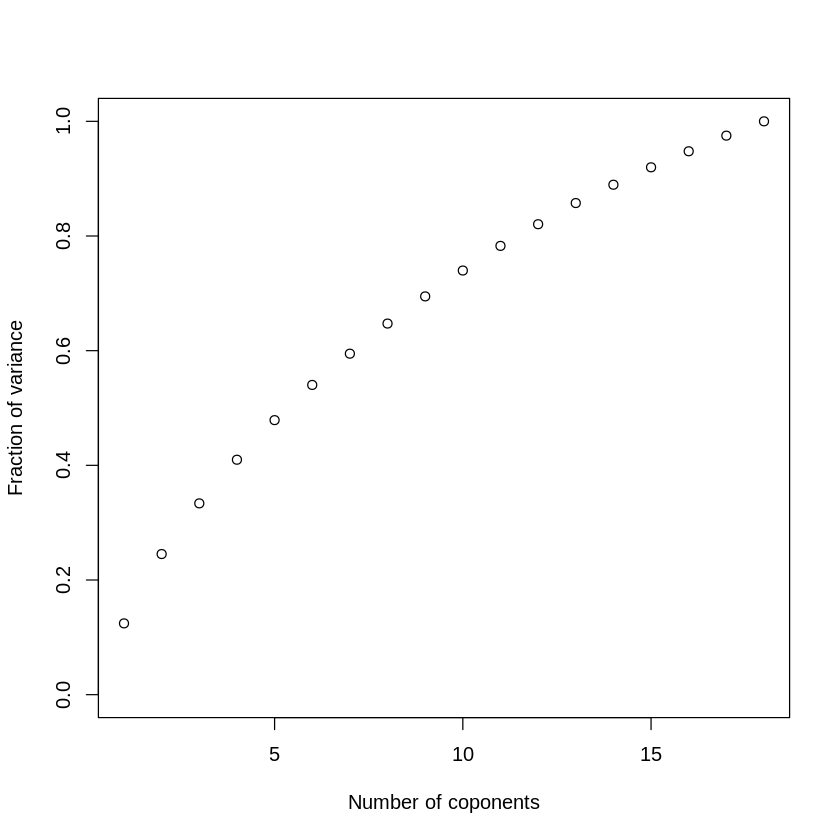

In [16]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [17]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [18]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,5,0.36
OwnRent,4,0.31
Atti,15,0.27
HouseholdS,6,0.26
Income,9,0.26
HabitC,18,0.24
HabitG,17,0.22
MC,12,0.21
Age,2,0.20
ComfNW,14,0.16
Educ,10,0.15


In [19]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [20]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitG', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')

In [21]:
fmla <- as.formula(paste("HabitG",paste(IndepPred,collapse="+"),sep="~"));

In [22]:
table(data2[,"HabitG"])


 1.5    2 2.25  2.5 2.75    3 3.25  3.5 3.75    4 4.25  4.5 4.75    5 5.25  5.5 
   3    2    2    5    9   11   14   16   23   27   32   37   32   54   34   68 
5.75    6 6.25  6.5 6.75    7 
  46   53   50   33   23   53 

In [23]:
mod = lm(fmla,data=data2)
summary(mod)

Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 7 in model.matrix: no columns are assigned"


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.928 -0.657  0.168  0.762  3.076 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.41768    0.56901    6.01  3.3e-09 ***
SqftCate    -0.03159    0.04699   -0.67    0.502    
OwnRent     -0.08365    0.09723   -0.86    0.390    
Atti         0.11961    0.04424    2.70    0.007 ** 
HouseholdS  -0.04993    0.04026   -1.24    0.215    
Income      -0.03134    0.02468   -1.27    0.205    
HabitC       0.21008    0.03306    6.35  4.1e-10 ***
MC           0.23955    0.04297    5.57  3.7e-08 ***
Age          0.00280    0.00420    0.67    0.506    
ComfNW       0.03813    0.02625    1.45    0.147    
Educ        -0.12666    0.04077   -3.11    0.002 ** 
Gender      -0.00649    0.09001   -0.07    0.943    
Political   -0.05804    0.05404   -1.07    0.283    
Ethnic      -0.01400    0.11695   -0.12    0.905    
ComfNS      -0.04542    0.03035   -1.50    0.135    
SN           

In [ ]:
anova(mod)

In [ ]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)

In [ ]:
#model without age
IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'ComfNW', 'Latitude', 'Ethnic')
fmla <- as.formula(paste("HabitG",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)

In [ ]:
plot(mod)

In [ ]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [ ]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

In [ ]:
library(mgcv)


In [ ]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)


In [ ]:
plot(mGam)

In [ ]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)


In [ ]:
anova(mod1)

In [ ]:
drop1(mod1)

In [ ]:
library(bnlearn)

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [ ]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)

In [ ]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)